# Trial 3

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [19]:
# POSITIVE  = r'/home/tsdhrm/Pictures/thesis/100Dataset/Positive'
POSITIVE = r'/Users/teguhsatya/Desktop/100Data/positive'

In [20]:
images = {}
for fname in os.listdir(POSITIVE):
    f = fname.split('.')[0]
    images[f] = cv2.imread(os.path.join(os.path.join(POSITIVE, fname)))
    images[f] = cv2.cvtColor(images[f], cv2.COLOR_BGR2RGB)

In [86]:
def resize_all(imgs, prcnt=50):
    resized = {}
    for img in imgs:
        resized[img] = cv2.resize(imgs[img], (int(imgs[img].shape[1]*prcnt/100), int(imgs[img].shape[0]*prcnt/100)), cv2.INTER_AREA)
    return resized

def display_all(imgs, subs, use_gray=False):
    fig, axs = plt.subplots(subs[0], subs[1], figsize=(18, 21))
    k = 0
    for i in range(subs[0]):
        for j in range(subs[1]):
            axs[i, j].imshow(list(imgs.values())[k], 'gray' if use_gray else None)
            axs[i, j].set_title(list(imgs.keys())[k])
            axs[i, j].axis('off')
            k+=1
            
def display_all_with(imgs, subs, cc, use_gray=True):
    fig, axs = plt.subplots(subs[0], subs[1], figsize=(18, 21))
    k = 0
    for i in range(subs[0]):
        for j in range(subs[1]):
            axs[i, j].imshow(list(imgs.values())[k][:,:,cc], cmap='gray' if use_gray else None)
            axs[i, j].set_title(list(imgs.keys())[k])
            axs[i, j].axis('off')
            k+=1
            
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def get_the_roi(imgs):
    rois = {}
    converted = {}
    green = {}
    red = {}
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (45,45))
    for img in imgs:
        LAB = cv2.cvtColor(imgs[img], cv2.COLOR_RGB2LAB)
        l, a , b = cv2.split(LAB)
        clahe = cv2.createCLAHE(2.0, (8,8))
        l = clahe.apply(l)
        lab = cv2.merge([l, a, b])
        cvt = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
        cropped = cvt[250:-250, 250:-300]
        channel = cropped[:,:,2]
        gmc = adjust_gamma(channel, 0.3)
        converted[img] = cv2.morphologyEx(gmc, cv2.MORPH_OPEN, kernel)
        
    
        

        
    # display_all_with(converted, (10,10), 1)
    #display_all(converted, (10,10), True)
    display_all(converted, (10,10), True)
        
        
        
    return rois

In [25]:
rsz_imgs = resize_all(images)

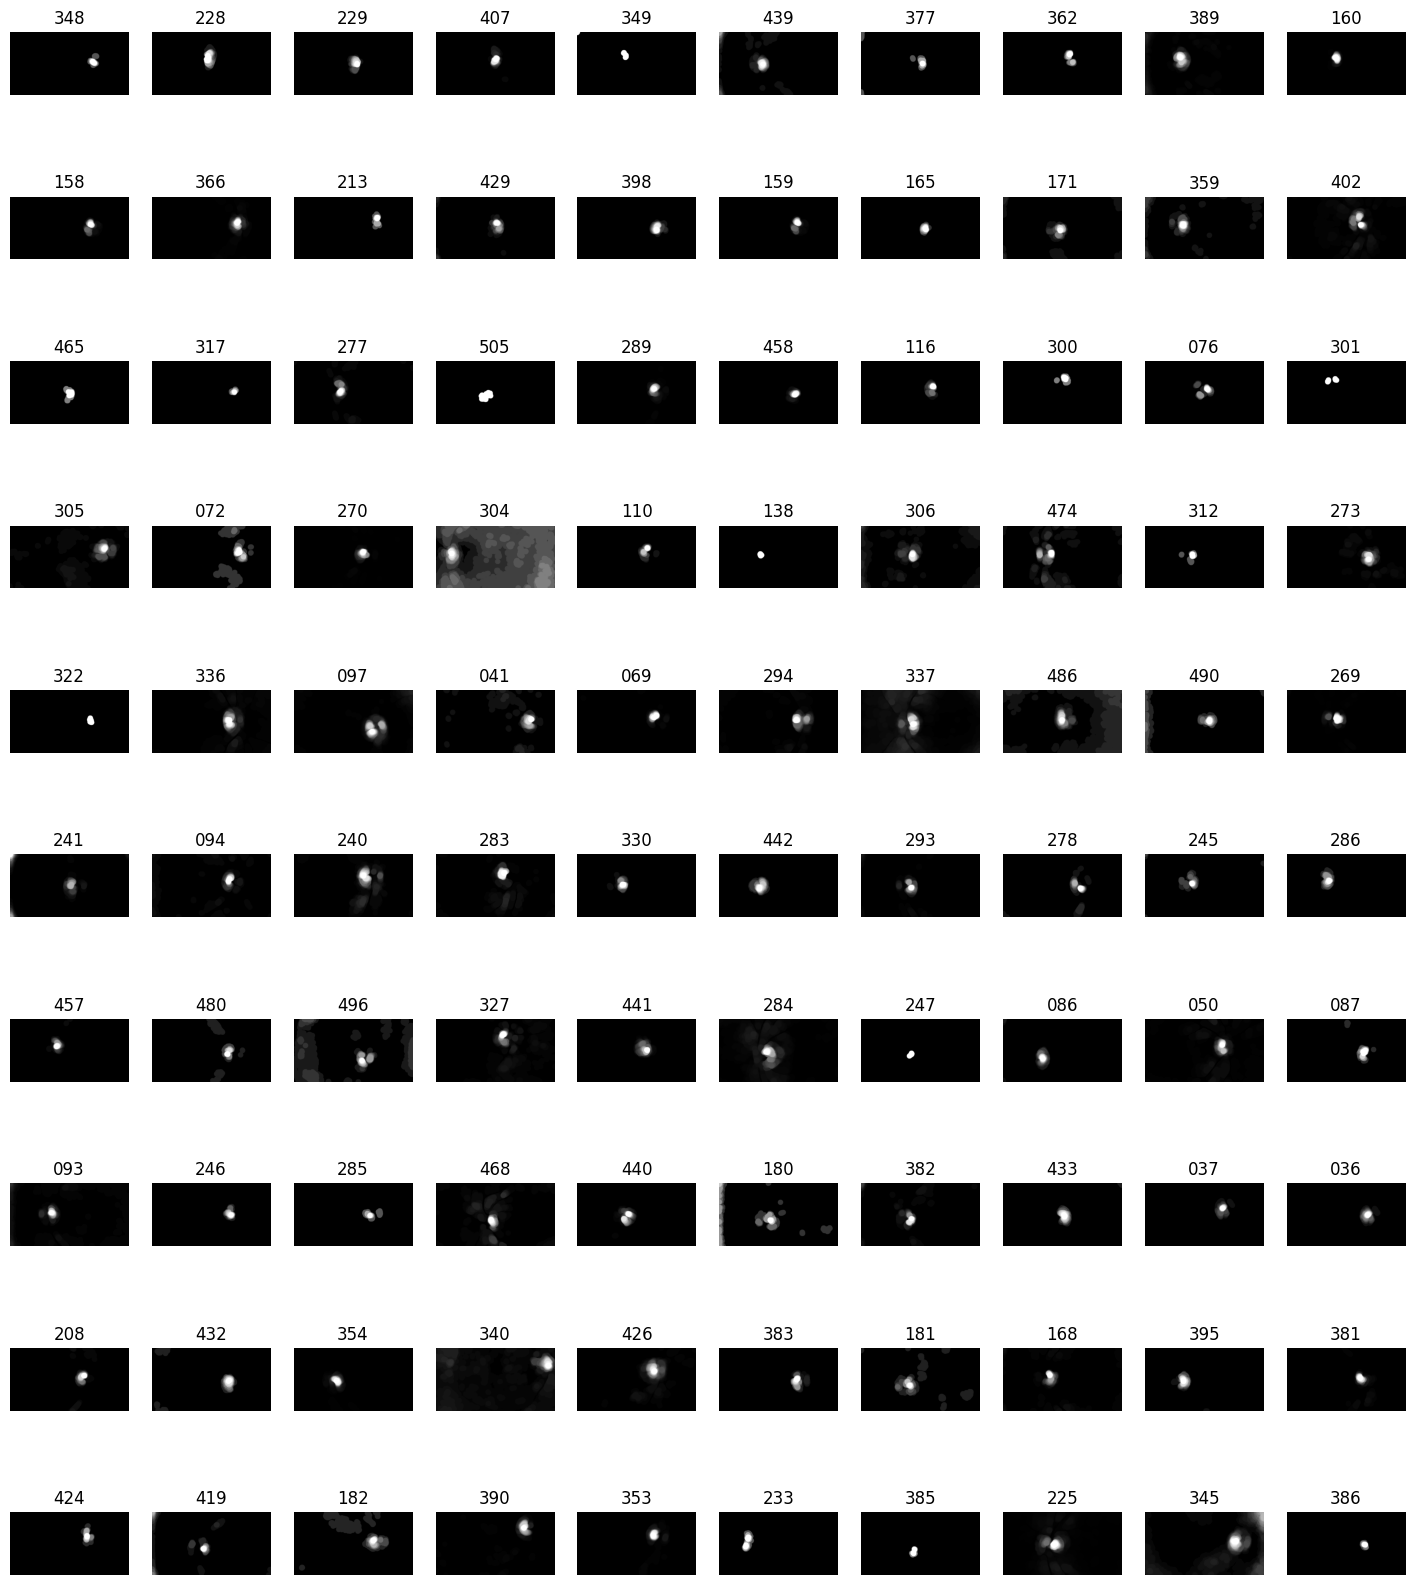

In [87]:
roi = get_the_roi(rsz_imgs.copy())